# paAIP2 Population Analysis

In [1]:
# Configure Notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Import packages and modules
import os
import numpy as np

from Lab_Analyses.Population_Analysis import population_utilities as p_utils
from Lab_Analyses.Population_Analysis.preprocess_population_data_v2 import organize_population_data
from Lab_Analyses.Population_Analysis.paAIP2_population_analysis_v2 import paAIP2_population_analysis
from Lab_Analyses.Population_Analysis import paAIP2_population_plotting_v2 as plotting

%matplotlib inline

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Datasets

In [26]:
# paAIP2 mouse ids
pa_1 = "JW156" # Not using due to missing session
pa_2 = "JW157"
pa_3 = "JW158"
pa_4 = "JW159"
pa_5 = "JW175" # not using due to poor image quality
pa_6 = "JW176" # not using due to poor image quality
pa_7 = "JW383"

#pa_mice = [pa_2, pa_3, pa_4, pa_5, pa_6, pa_7]
pa_mice = [pa_2, pa_3, pa_4, pa_7]


# EGFP mouse ids
gfp_1 = "JW196"
gfp_2 = "JW197"
gfp_3 = "JW198"
gfp_4 = "JW199"
gfp_5 = "JW368" 
gfp_6 = "JW371" # Last session seems weird
gfp_7 = "JW372" 

#gfp_mice = [gfp_1, gfp_2, gfp_3, gfp_4, gfp_5, gfp_7]
gfp_mice = [gfp_1, gfp_2, gfp_4, gfp_5, gfp_7]
gfp_mice = [gfp_1, gfp_2, gfp_4]


## Analysis Parameters
roi_match = False
sensor = "RCaMP2"
zoom_factor = 2
reprocess = False
activity_window = (-1, 2)


## Preprocess data

In [ ]:
# paAIP2 mice
for mouse in pa_mice:
    organize_population_data(
        mouse_id=mouse,
        roi_match=roi_match,
        sensor=sensor,
        zoom_factor=zoom_factor,
        reprocess=True,
        save=True
    )
    
# EGFP mice
for mouse in gfp_mice:
    organize_population_data(
        mouse_id=mouse,
        roi_match=roi_match,
        sensor=sensor,
        zoom_factor=zoom_factor,
        reprocess=True,
        save=True
    )

## Analyze Population Data

In [19]:
paAIP2_population_analysis(
    paAIP2_mice=pa_mice,
    EGFP_mice=gfp_mice,
    activity_window=activity_window,
    save_ind=True
)

----------------------------------------
- Analyzing JW157
--- Event detection
--- Movement responsiveness
(48204, 244)
(48476, 149)
(50793, 240)
--- Movement related activity
130


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


65


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


119
----------------------------------------
- Analyzing JW158
--- Event detection


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Utilities\data_utilities.py:199: RuntimeWarning: invalid value encountered in true_divide
  z = (data[:, i] - data[:, i].mean()) / data[:, i].std(ddof=0)


--- Movement responsiveness
(48638, 268)
(35840, 212)
(35603, 206)
--- Movement related activity


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


112


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


113


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


127
----------------------------------------
- Analyzing JW159
--- Event detection


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Utilities\data_utilities.py:199: RuntimeWarning: invalid value encountered in true_divide
  z = (data[:, i] - data[:, i].mean()) / data[:, i].std(ddof=0)


--- Movement responsiveness
(49775, 181)
(36300, 129)
(36889, 62)
--- Movement related activity


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


116


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


87
15
----------------------------------------
- Analyzing JW383
--- Event detection


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Utilities\data_utilities.py:199: RuntimeWarning: invalid value encountered in true_divide
  z = (data[:, i] - data[:, i].mean()) / data[:, i].std(ddof=0)


--- Movement responsiveness
(52281, 270)
(45168, 304)
(37985, 252)
--- Movement related activity


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


209


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


121


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


57
----------------------------------------
- Analyzing JW196
--- Event detection


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Utilities\data_utilities.py:199: RuntimeWarning: invalid value encountered in true_divide
  z = (data[:, i] - data[:, i].mean()) / data[:, i].std(ddof=0)


--- Movement responsiveness
(45810, 356)
(38656, 306)
(32821, 289)
--- Movement related activity


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


119


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


200


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


148
----------------------------------------
- Analyzing JW197
--- Event detection


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Utilities\data_utilities.py:199: RuntimeWarning: invalid value encountered in true_divide
  z = (data[:, i] - data[:, i].mean()) / data[:, i].std(ddof=0)


--- Movement responsiveness
(39120, 116)
(39560, 111)
(35548, 102)
--- Movement related activity
36


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


44


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


40
----------------------------------------
- Analyzing JW199
--- Event detection


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Utilities\data_utilities.py:199: RuntimeWarning: invalid value encountered in true_divide
  z = (data[:, i] - data[:, i].mean()) / data[:, i].std(ddof=0)


--- Movement responsiveness
(41650, 198)
(33781, 147)
(32611, 179)
--- Movement related activity
152


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


116


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


146
----------------------------------------
- Analyzing JW368
--- Event detection


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Utilities\data_utilities.py:199: RuntimeWarning: invalid value encountered in true_divide
  z = (data[:, i] - data[:, i].mean()) / data[:, i].std(ddof=0)


--- Movement responsiveness
(67184, 309)
(43273, 237)
(63645, 242)
--- Movement related activity


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


186


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


75


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


108
----------------------------------------
- Analyzing JW372
--- Event detection


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Utilities\data_utilities.py:199: RuntimeWarning: invalid value encountered in true_divide
  z = (data[:, i] - data[:, i].mean()) / data[:, i].std(ddof=0)


--- Movement responsiveness
(57619, 160)
(52584, 135)
(57489, 136)
--- Movement related activity


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


70


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


39


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


61


## Visualize data

In [27]:
# Load datasets
EGFP_data_list = p_utils.load_analyzed_pop_datasets(gfp_mice, "EGFP")
paAIP2_data_list = p_utils.load_analyzed_pop_datasets(pa_mice, "paAIP2")

figure_path = r"C:\Users\Jake\Desktop\Figures\grouped_data\paAIP2_Population\Activity"

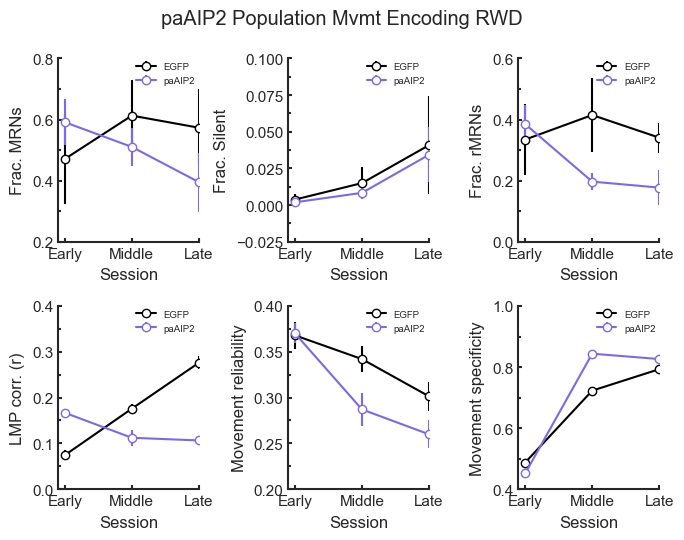

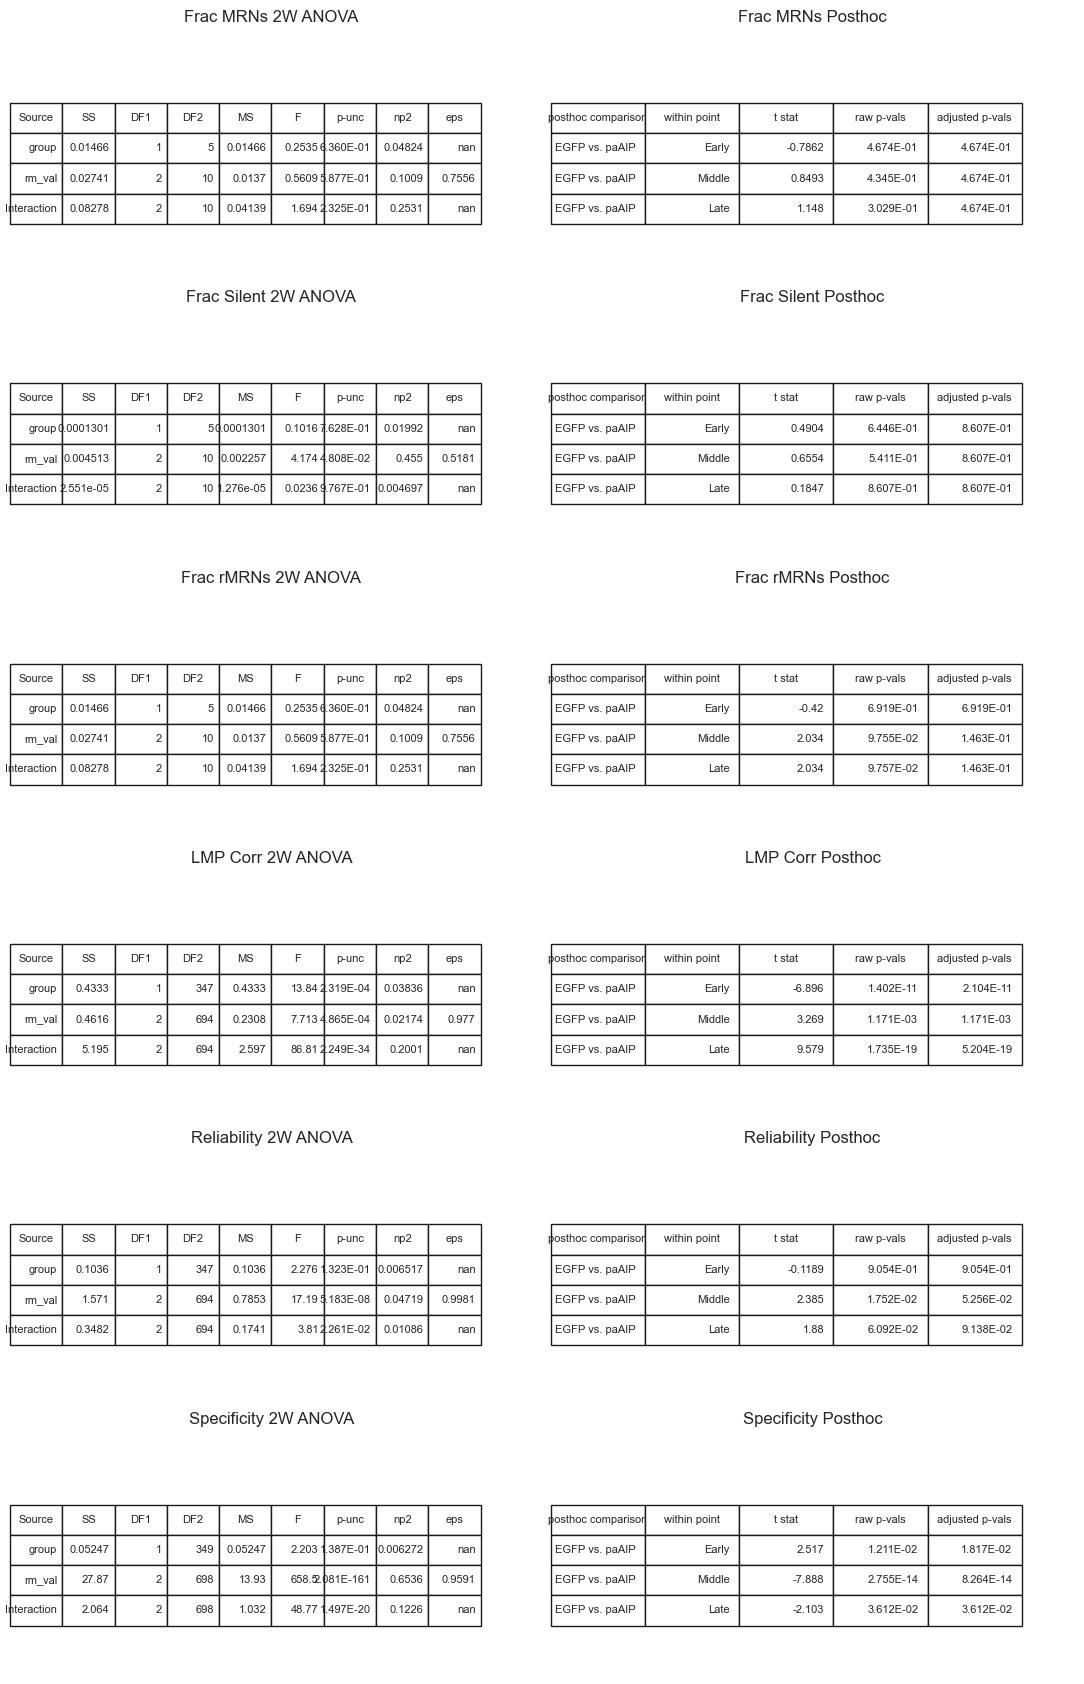

In [28]:
# Plot Movement Encoding
plotting.plot_paAIP2_population_movement_encoding(
    EGFP_data_list,
    paAIP2_data_list,
    norm=False,
    rwd=True,
    figsize=(7,5.5),
    display_stats=True,
    save=False,
    save_path=figure_path,
)

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\pingouin\distribution.py:1006: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


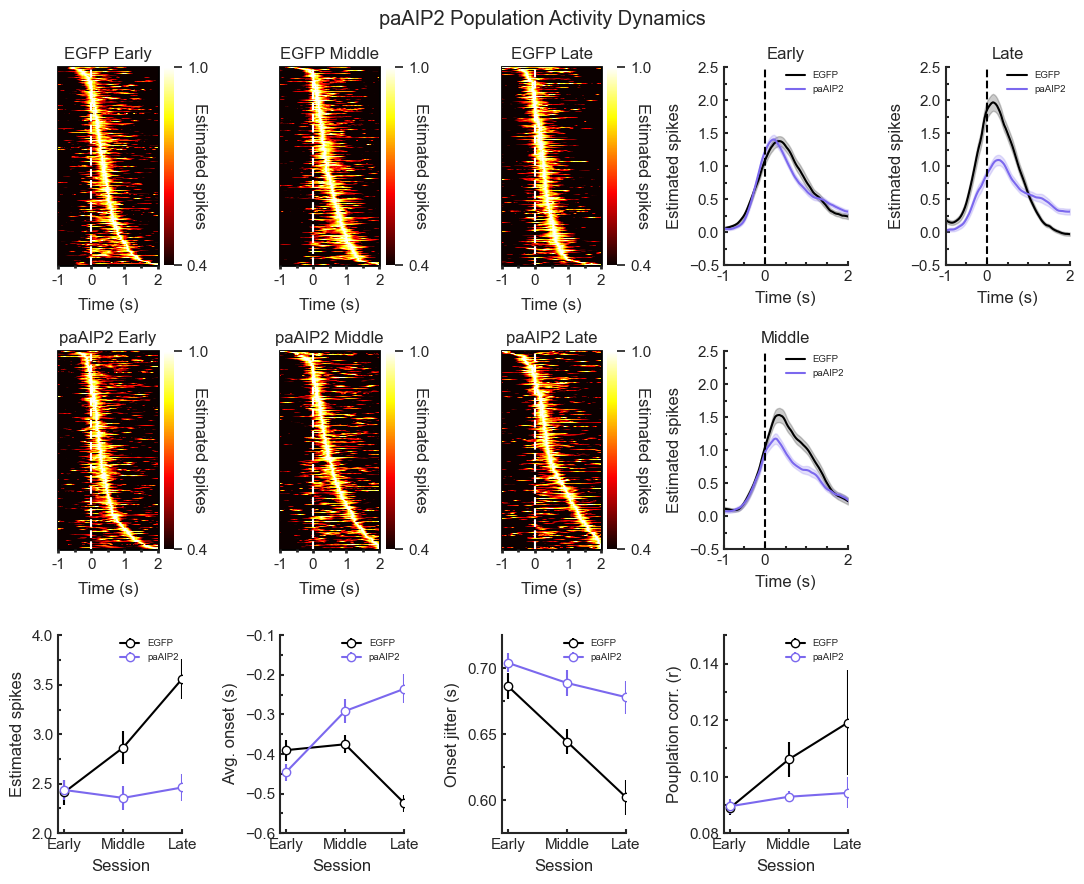

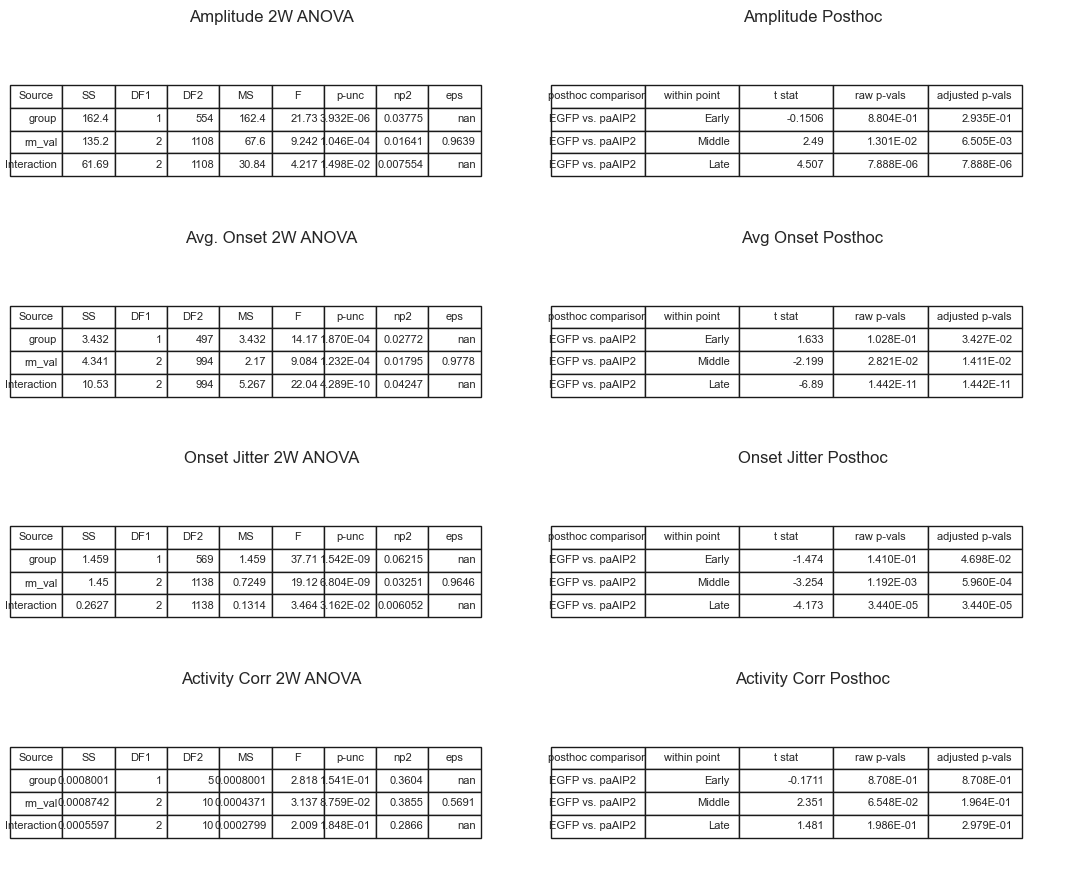

In [33]:
# Plot Movement Activity Dynamics
plotting.plot_paAIP2_population_movement_dynamics(
    EGFP_data_list,
    paAIP2_data_list,
    norm=False,
    mvmt_only=True,
    rwd=True,
    figsize=(11,9),
    display_stats=True,
    save=True,
    save_path=figure_path,
)

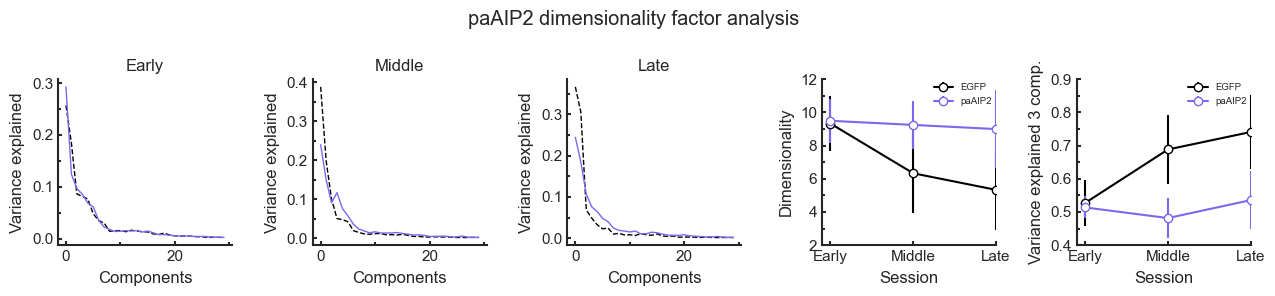

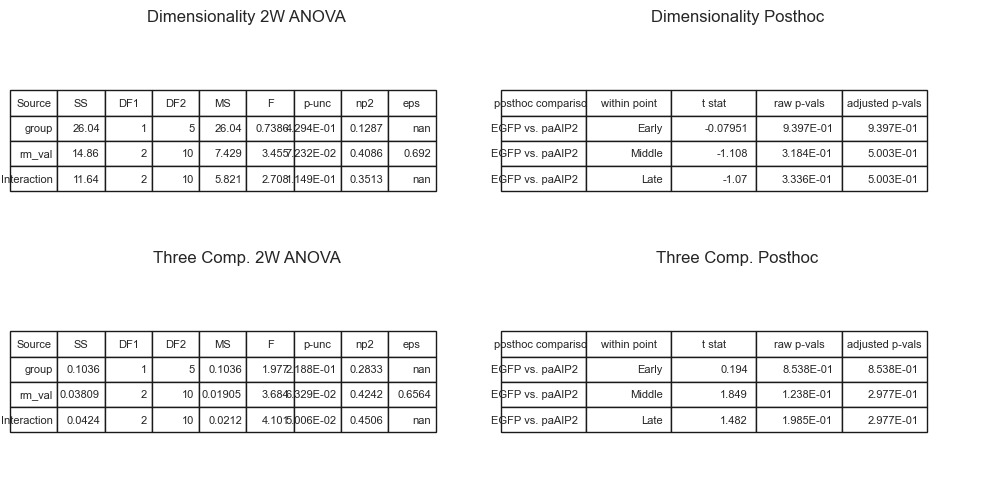

In [30]:
# Plot dimensionality
plotting.plot_paAIP2_dimensionality(
    EGFP_data_list,
    paAIP2_data_list,
    factor=True,
    figsize=(13,3),
    display_stats=True,
    save=False,
    save_path=figure_path
)

EGFP AVG similarity:
 [[2.37593996 3.8135512  3.3231091 ]
 [2.5272205  3.94527611 2.95266003]
 [2.52232159 4.13493263 2.8374588 ]]
paAIP2 AVG similarity:
 [[2.73898924 2.59596588 3.57390771 2.33906274]
 [3.19362804 3.71617235 5.12239678 2.85331954]
 [1.89477564 2.86306637 7.12673805 3.07033195]]


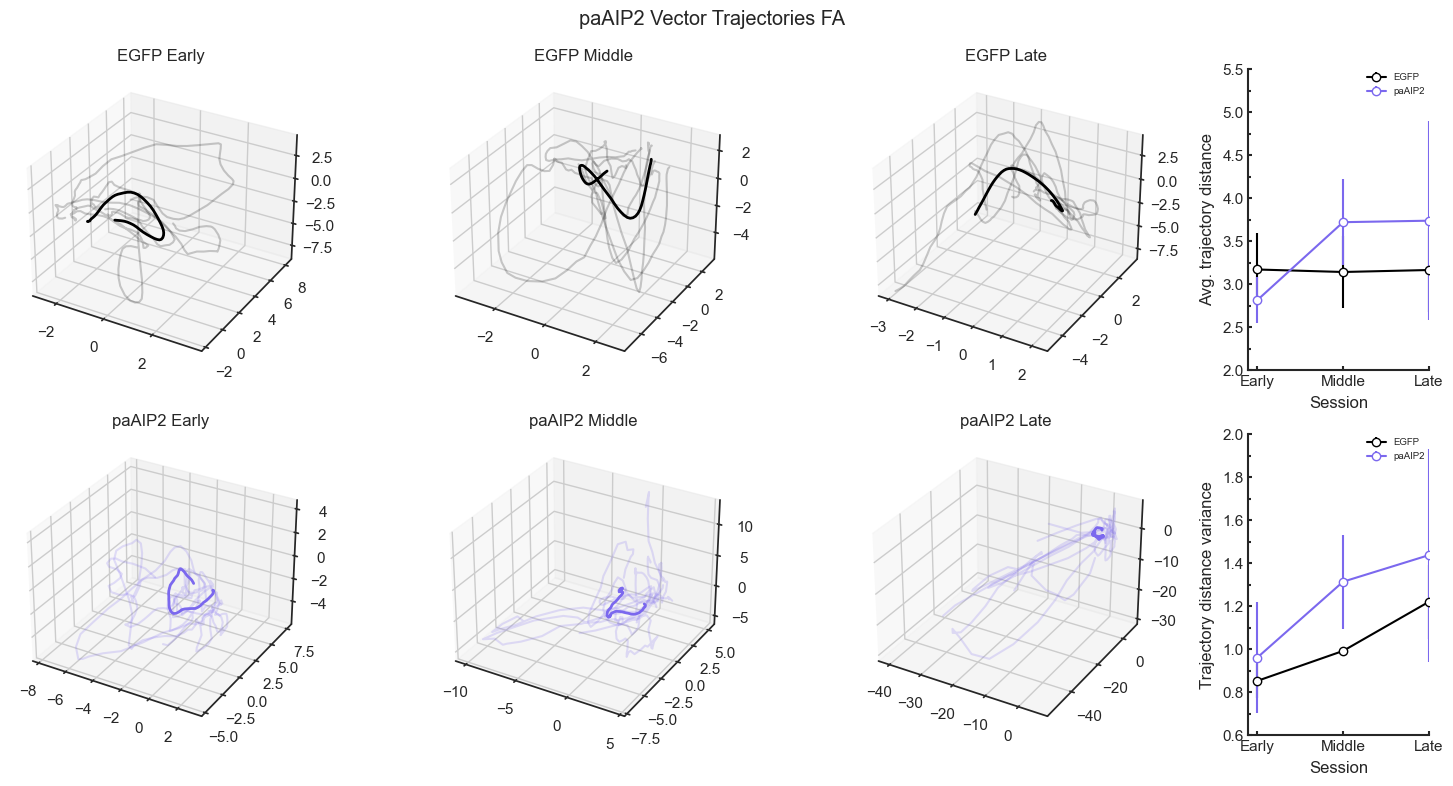

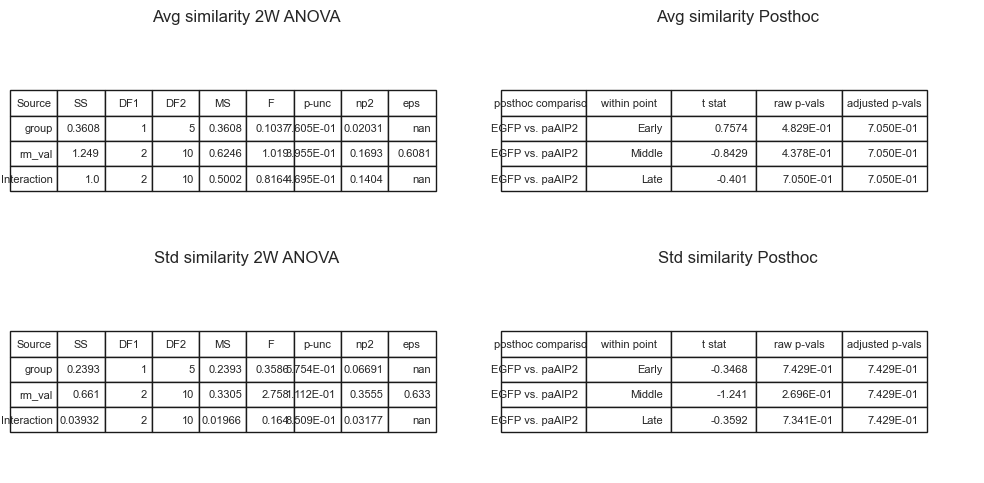

In [47]:
# Plot vector trajectories
plotting.plot_population_vectors(
    EGFP_data_list,
    paAIP2_data_list,
    factor=True,
    EGFP_example=0,
    paAIP2_example=2,
    figsize=(15,8),
    display_stats=True,
    save=False,
    save_path=figure_path
)

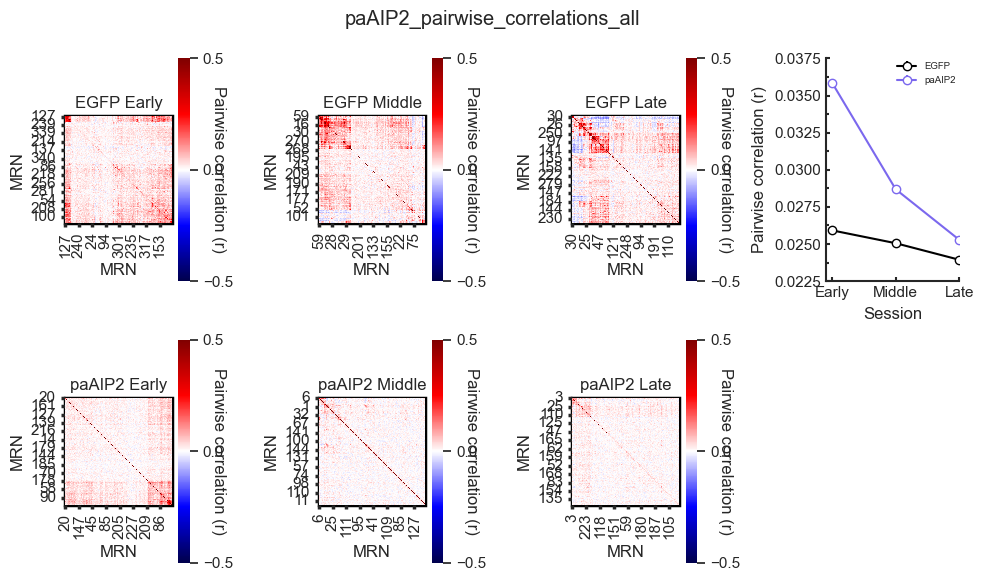

In [40]:
# Plot pairwise correlations
plotting.plot_pairwise_correlations(
    EGFP_data_list,
    paAIP2_data_list,
    MRN=False,
    EGFP_example=0,
    paAIP2_example=0,
    figsize=(10,6),
    display_stats=False,
    save=False,
    save_path=figure_path
)

In [ ]:
import numpy as np

a = np.arange(20) - 4

b = a.reshape((4,5))
print(b)
c = b *  2

np.sum(np.linalg.norm(b - c, axis=1))

In [ ]:
# Convert data to dictionaries
from Lab_Analyses.Utilities.save_load_pickle import save_pickle
import os
sessions = ["Early", "Middle", "Late"]
for mouse in gfp_mice:
    print(mouse)
    datasets, spike_sets = p_utils.load_population_datasets(mouse, sessions)
    for session in sessions:
        print(session)
        d = datasets[session]
        s = spike_sets[session]
        # Convert data to dict
        data_dict = {
            "mouse_id": d.mouse_id,
            "session": d.session,
            "date": d.date,
            "imaging_parameters": d.imaging_parameters,
            "time": d.time,
            "lever_force_resample": d.lever_force_resample,
            "lever_force_smooth": d.lever_force_smooth,
            "lever_velocity_envelope": d.lever_velocity_envelop,
            "lever_active": d.lever_active,
            "rewarded_movement_force": d.rewarded_movement_force,
            "rewarded_movement_binary": d.rewarded_movement_binary,
            "binary_cue": d.binary_cue,
            "reward_delivery": d.reward_delivery,
            "punish_delivery": d.punish_delivery,
            "cell_positions": d.cell_positions,
            "fluorescence": d.fluorescence,
            "dFoF": d.dFoF,
            "processed_dFoF": d.processed_dFoF,
            "spikes": s,
        }
        path = r"G:\Analyzed_data\individual"
        save_path = os.path.join(path, d.mouse_id, "population_data")
        fname = f"{d.mouse_id}_{session}_combined_data"
        save_pickle(fname, data_dict, save_path)

In [ ]:
import pandas as pd
a = np.array([[1,1,1],
              [2,2,2]])

pd.DataFrame(a)

In [ ]:
# Plot some session traces
## Select data
data = paAIP2_data_list[1]
data = EGFP_data_list[0]

## Traces
traces = data.zscore_smooth_spikes[0]
mvmt = data.lever_active[0]
color = "mediumslateblue"

In [ ]:
import matplotlib.pyplot as plt
%matplotlib qt
save_path = r"C:\Users\Jake\Desktop\Figures\Examples\Example_images\coactivity_plasticity\Local_Coactivity\basal_stable"

x = np.arange(traces.shape[0]) / 30
fig, ax = plt.subplot_mosaic("""A""",figsize=(7,10))
title = "JW196_EGFP_Day_1"
# Randomly select 20 traces
#idxs = np.random.randint(low=0, high=traces.shape[1], size=20)
idxs = [0,1,2,3,4,5,6,7]
for j, i in enumerate(idxs):
    print(i)
    ax["A"].plot(x[:], traces[:, i] + j * 10, color=color, linewidth=.5)

In [ ]:
data.__dict__.keys()

In [ ]:
from Lab_Analyses.Population_Analysis.population_utilities import load_population_datasets
import os

In [ ]:
path = r"G:\Analyzed_data\individual\JW372\population_data"
mouse = "JW199"
sessions = ["Early", "Middle", "Late"]
datasets, spike_sets = load_population_datasets(mouse, sessions)

In [ ]:
dFoF = datasets["Early"].processed_dFoF
f = datasets["Early"].dFoF
spikes = spike_sets["Early"]

color_dFoF = "mediumslateblue"
color_spikes = "red"

In [ ]:
from Lab_Analyses.Utilities.deconvolve_calcium import oasis
from scipy.ndimage import uniform_filter1d

oasis_spikes = oasis(f, batch_size=500, tau=1.5, sampling_rate=30)
deconvolved = uniform_filter1d(oasis_spikes, 6, axis=0)

In [ ]:
from Lab_Analyses.Utilities.spike_event_detection import cascade_event_detection

_, floored_spikes = cascade_event_detection(spikes, cutoff=0.2)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib qt
save_path = r"C:\Users\Jake\Desktop\Figures\Examples\Example_images\coactivity_plasticity\Local_Coactivity\basal_stable"

x = np.arange(dFoF.shape[0]) / 30
fig, ax = plt.subplot_mosaic("""A""",figsize=(7,10))
title = "JW196_EGFP_Day_1"
# Randomly select 20 traces
idxs = np.random.randint(low=0, high=dFoF.shape[1], size=30)
#idxs = np.arange(dFoF.shape[1])
#idxs = [2]
for j, i in enumerate(idxs):
    print(i)
    #ax["A"].plot(x[:], dFoF[:, i] + j + 2, color="mediumslateblue", linewidth=1)
    ax["A"].plot(x[:], spikes[:, i] + j + 1, color="red", linewidth=1)
    #ax["A"].plot(x[:], oasis_spikes[:, i] + 2, color="black", linewidth=1)
    #ax["A"].plot(x[:], deconvolved[:, i] + 3, color="grey", linewidth=1)
    #ax["A"].plot(x[:], floored_spikes[:, i] + j * 2, color="goldenrod", linewidth=.5)

In [ ]:
fig, ax = plt.subplot_mosaic("""A""",figsize=(7,10))
ax["A"].plot(x[:], oasis_spikes[:, i] + j * 2, color="black", linewidth=.5)
ax["A"].plot(x[:], f[:, i] + j * 2, color="red", linewidth=.5)

In [ ]:
import numpy as np

a = np.array([[1,1,1],
              [2,2,2],
             [3,3,3],
             [4,4,4],
             [5,5,5]])


s = np.array_split(a, 2, axis=0)

type(s)

In [ ]:
a = [1,1,1,1]

b = [a, a, a, a, a]

np.vstack(b)

In [ ]:
def corr_mat(A,B):
    #A = A[:, :length]
    #B = B[:, :length]
    A = A.T
    B = B.T

    # Get number of rows in either A or B (should be same)
    n = B.shape[0]
    # Store column-wise in A and B
    sA = A.sum(axis=0)
    sB = B.sum(axis=0)

    # Vectorize and broadcast the A and B
    p1 = n * np.dot(B.T, A)
    p2 = sA * sB[:, None]
    p3 = n * ((B**2).sum(axis=0)) - (sB**2)
    p4 = n * ((A**2).sum(axis=0)) - (sA**2)

    # Compute pairwise Pearsons Correlation Coefficient as 2D array
    pcorr = (p1 - p2) / np.sqrt(p4 * p3[:, None])
    print(pcorr)

In [ ]:
corr_mat(arr, arr)

In [ ]:
r, p = stats.spearmanr(a=arr,b=None, axis=1)

print(r)
print(np.nanmedian(r))

In [ ]:
transitions = []
for start, stop in zip(start_idxs, stop_idxs):
    trans = refine_start_stop(start, stop, deriv, cutoff=0.005)
    transitions.append(trans)
transitions

In [ ]:
refined_active = np.zeros(len(active_x))
for trans in transitions:
    refined_active[trans[0]: trans[1]] = 1
    
floored = np.copy(x)
inactive_idxs = np.nonzero(refined_active == 0)[0]
print(inactive_idxs)
floored[inactive_idxs] = 0
print(x)
print(floored)

In [ ]:
plt.plot(d)
plt.plot(x)
#plt.plot(active_x)
plt.plot(refined_active)

In [ ]:
plt.plot(x)
plt.plot(floored)

In [ ]:
import numpy
mvmt_window = (-1, 2)
sampling_rate = 30
frame_num = (np.absolute(mvmt_window[0]) * sampling_rate) + (
            np.absolute(mvmt_window[1]) * sampling_rate
        )
center_point = np.absolute(mvmt_window[0]) * sampling_rate
print(frame_num)
print(center_point)

a = np.ones(frame_num)
bin_size = 3
bin_num = int(frame_num/  bin_size)
center_point = np.absolute(mvmt_window[0]) * sampling_rate
print(center_point)
time_bins = np.linspace(0, frame_num, bin_num + 1).astype(int)
time_bins_sec = (time_bins - center_point) / sampling_rate
time_bins_sec

In [ ]:
l = time_bins
[(l[i], l[i+1]) for i in range(len(l)-1)]

In [ ]:
a = np.array([[1,10,100],
              [2,20,200]])

d = {1: a, 2: a*2, 3: a*3, 4: a*4}
vals = list(d.values())
vals

In [ ]:
stack = np.dstack(vals)

In [ ]:
stack.shape

In [ ]:
reslice = [stack[:, i, :] for i in range(stack.shape[1])]

In [ ]:
reslice